# Keywords Search Recommender

The dataset is available [here](https://github.com/ChiefAdit/Bangkit/blob/ML/search-keywords-cat.txt).

## Clean Data

In [2]:
import tensorflow as tf
import string
import requests

Now let's lowercase the plain text and split it into a list of sentences. 

In [3]:
# Load the dataset
data = open('./search-keywords-cat.txt').read()

# Lowercase and split the text
corpus = data.lower().split("\n")

# Preview the result
print(corpus[0])

gejala dan pengobatan penyakit ginjal pada kucing


The total number of rows of data is 1273.

In [4]:
len(corpus)

1273

Now we have a list of rows in the data. And then `join` all the lines to create a long string consisting of the data in continuous format.

In [5]:
corpus = " ".join(corpus)
corpus[:1000]

'gejala dan pengobatan penyakit ginjal pada kucing penyebab dan pengobatan diabetes kucing cara mengatasi masalah pernapasan pada kucing tanda-tanda dan pengobatan penyakit kulit pada kucing cara mengobati infeksi saluran kemih pada kucing penyebab dan pengobatan penyakit hati pada kucing cara merawat gigi kucing untuk mencegah penyakit gigi mengenal tanda-tanda dan pengobatan penyakit jantung pada kucing cara mengobati alergi pada kucing gejala dan pengobatan penyakit perut pada kucing cara mengatasi gangguan pencernaan pada kucing penyebab dan pengobatan penyakit mata pada kucing tanda-tanda dan pengobatan penyakit tulang dan sendi pada kucing mengatasi masalah kecemasan dan stres pada kucing penyebab dan pengobatan gangguan peredaran darah pada kucing cara mengobati masalah reproduksi pada kucing tanda-tanda dan pengobatan penyakit pernapasan kronis pada kucing mengatasi masalah kesehatan pada kucing yang lebih tua penyebab dan pengobatan gangguan sistem saraf pada kucing cara mengo

In [6]:
def clean_text(doc):
  tokens = doc.split()
  table = str.maketrans('', '', string.punctuation)
  tokens = [w.translate(table) for w in tokens]
  tokens = [word for word in tokens if word.isalpha()]
  tokens = [word.lower() for word in tokens]
  return tokens

tokens = clean_text(data)
print(tokens[:5])

['gejala', 'dan', 'pengobatan', 'penyakit', 'ginjal']


The total word count is 13012 words.

In [7]:
len(tokens)

13012

There are 1246 total of unique words

In [8]:
len(set(tokens))

1246

Now we are predict the 6th word using a set of max 5 words. So split the data into blocks of 6 words each and finally separate the last word from each row. Limit the dataset up to 200,000 words. 

In [9]:
length = 5 + 1
lines = []

for i in range(length, len(tokens)):
  seq = tokens[i-length:i]
  line = ' '.join(seq)
  lines.append(line)
  if i > 200000:
    break

print(len(lines))

13006


Display the first line of 6 words.

In [10]:
lines[0]

'gejala dan pengobatan penyakit ginjal pada'

The 6th word in this line is the output word used for prediction.

In [11]:
tokens[6]

'kucing'

This is the second line consisting of 6 words. We skipped a word. The 6th word in this line is the output word used for prediction.

In [12]:
lines[1]

'dan pengobatan penyakit ginjal pada kucing'

## Build LSTM Model

In [13]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

In [15]:
sequences = np.array(sequences)
X, y = sequences[:, :-1], sequences[:,-1]
X[0]

array([163,   3,  54,  27,  86])

In [16]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

1246


In [17]:
y = to_categorical(y, num_classes=vocab_size)

In [18]:
seq_length = X.shape[1]
seq_length

5

## LSTM Model

In [19]:
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=seq_length))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 32)             39872     
                                                                 
 lstm (LSTM)                 (None, 5, 64)             24832     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1246)              80990     
                                                                 
Total params: 182,878
Trainable params: 182,878
Non-trainable params: 0
_________________________________________________________________


In [21]:
learning_rate = 0.01
model.compile(
    loss = 'categorical_crossentropy',
    # optimizer = 'adam',
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics = ['accuracy']
    )

In [22]:
history = model.fit(X, y, batch_size = 128, epochs = 100, verbose=2)

Epoch 1/100
102/102 - 6s - loss: 5.5559 - accuracy: 0.0876 - 6s/epoch - 63ms/step
Epoch 2/100
102/102 - 1s - loss: 4.9001 - accuracy: 0.1213 - 1s/epoch - 13ms/step
Epoch 3/100
102/102 - 2s - loss: 4.1605 - accuracy: 0.2223 - 2s/epoch - 16ms/step
Epoch 4/100
102/102 - 1s - loss: 3.4775 - accuracy: 0.3300 - 1s/epoch - 13ms/step
Epoch 5/100
102/102 - 1s - loss: 2.9969 - accuracy: 0.3989 - 1s/epoch - 13ms/step
Epoch 6/100
102/102 - 1s - loss: 2.6231 - accuracy: 0.4519 - 1s/epoch - 13ms/step
Epoch 7/100
102/102 - 2s - loss: 2.3298 - accuracy: 0.4905 - 2s/epoch - 15ms/step
Epoch 8/100
102/102 - 2s - loss: 2.1022 - accuracy: 0.5196 - 2s/epoch - 15ms/step
Epoch 9/100
102/102 - 2s - loss: 1.9201 - accuracy: 0.5438 - 2s/epoch - 15ms/step
Epoch 10/100
102/102 - 1s - loss: 1.7657 - accuracy: 0.5639 - 1s/epoch - 14ms/step
Epoch 11/100
102/102 - 2s - loss: 1.6188 - accuracy: 0.5830 - 2s/epoch - 18ms/step
Epoch 12/100
102/102 - 2s - loss: 1.4832 - accuracy: 0.6141 - 2s/epoch - 20ms/step
Epoch 13/100


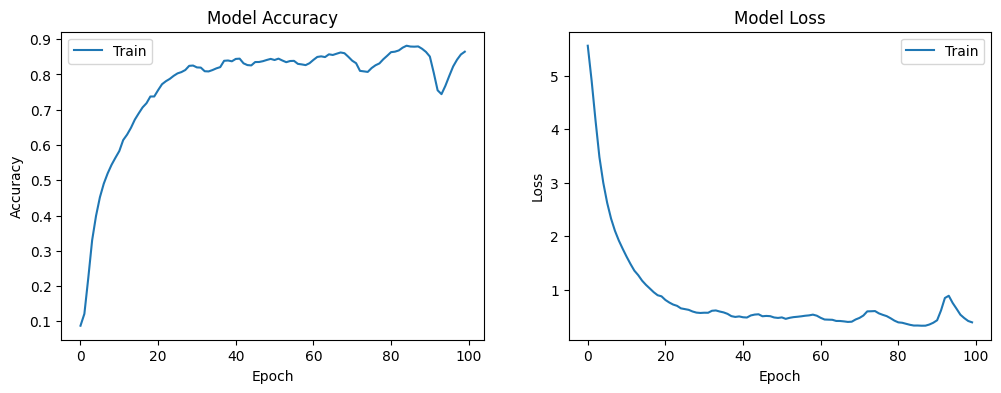

In [23]:
import matplotlib.pyplot as plt

# # Plot utility
# def plot_graphs(history, string):
#   plt.plot(history.history[string])
#   plt.xlabel("Epochs")
#   plt.ylabel(string)
#   plt.show()

# # Visualize the accuracy
# plot_graphs(history, "accuracy")
# plot_graphs(history, "val_acc")
# plot_graphs(history, "loss")
# plot_graphs(history, "val_loss")
# Plot the training progress
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
# plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
# plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# plt.tight_layout()
plt.show()

In [24]:
seed_text="bagaimana cara"
seed_text

'bagaimana cara'

In [25]:
def generate_text_seq(model, tokenizer, text_seq_length, seed_text, n_words):
  text = []

  for _ in range(n_words):
    encoded = tokenizer.texts_to_sequences([seed_text])[0]
    encoded = pad_sequences([encoded], maxlen = text_seq_length, truncating='pre')

    # y_predict = model.predict_classes(encoded)
    y_predict = np.argmax(model.predict(encoded), axis=1)

    predicted_word = ''
    for word, index in tokenizer.word_index.items():
      if index == y_predict:
        predicted_word = word
        break
    seed_text = seed_text + ' ' + predicted_word
    text.append(predicted_word)
  return ' '.join(text)

We can see that the model predicted next 5 words for the `seed_text`.

In [26]:
generate_text_seq(model, tokenizer, seq_length, "mengapa kucing", 5)

1/1 [==============================] - 0s 38ms/step


'suka menjilati atau menggigit bendabenda'

In [27]:
model.save("text_generation_model.h5")